In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=4,
    n_redundant=6,
    n_repeated=0,
    n_classes=2,
    random_state=42
)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [3]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        96
           1       0.74      0.66      0.70       104

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



In [18]:
probs = model.predict_proba(X_test)[:,1]
y_pred = (probs>0.4).astype(int)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        96
           1       0.70      0.83      0.76       104

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



In [5]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test,probs)
fpr[:5],tpr[:5],threshold[:5]

(array([0.        , 0.        , 0.        , 0.01041667, 0.01041667]),
 array([0.        , 0.00961538, 0.25      , 0.25      , 0.28846154]),
 array([       inf, 0.97767233, 0.81079408, 0.80928608, 0.79834578]))

In [6]:
decision_recall = 0.9
closest_index = np.argmin(abs(tpr-decision_recall))
fpr[closest_index],tpr[closest_index],threshold[closest_index]

(0.6666666666666666, 0.9038461538461539, 0.25452305812301523)

In [7]:
decision_recall = 0.81
closest_index = np.argmin(abs(tpr-decision_recall))
fpr[closest_index],tpr[closest_index],threshold[closest_index]

(0.3645833333333333, 0.8076923076923077, 0.41525174941276344)

In [8]:
from sklearn.metrics import auc

area = auc(fpr,tpr)
area

0.7907652243589742

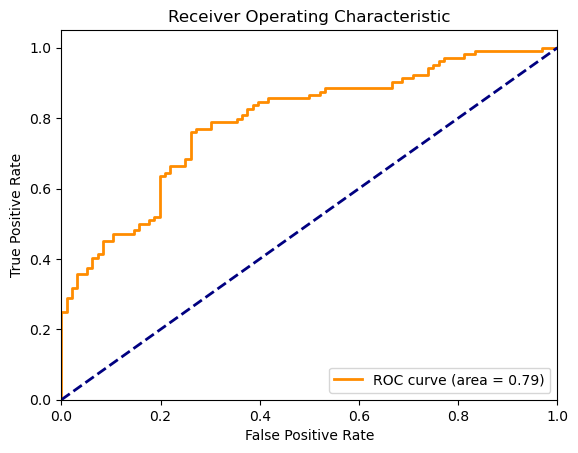

In [19]:
## plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
probs_xgb = model_xgb.predict_proba(X_test)[:,1]

fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test,probs_xgb)
fpr_xgb[:5], tpr_xgb[:5], threshold_xgb[:5]

(array([0.        , 0.        , 0.        , 0.01041667, 0.01041667]),
 array([0.        , 0.00961538, 0.04807692, 0.04807692, 0.5       ]),
 array([       inf, 0.999967  , 0.9999459 , 0.99994516, 0.9982059 ],
       dtype=float32))

In [16]:
area2 = auc(fpr_xgb,tpr_xgb)
area2

0.9438100961538461

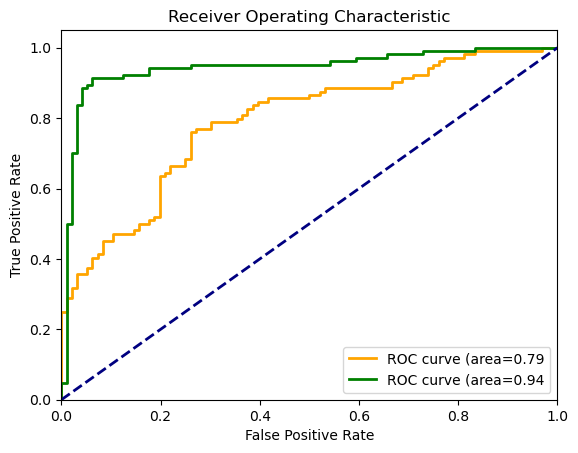

In [21]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=2,label="ROC curve (area=%0.2f"% area)
plt.plot(fpr_xgb,tpr_xgb,color="green",lw=2,label="ROC curve (area=%0.2f"% area2)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
decision_recall = 0.91
closest_ind = np.argmin(abs(tpr_xgb-decision_recall))
fpr_xgb[closest_ind],tpr_xgb[closest_ind],threshold_xgb[closest_ind]

(0.0625, 0.9134615384615384, 0.46240532)